In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [138]:
X, y  = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42,class_sep=1.5,hypercube=False)
df = pd.DataFrame(X, columns=['X1', 'X2'])

In [31]:
X.shape,y.shape

((100, 2), (100,))

In [32]:
X

array([[ 5.36336032e-01, -9.24927978e-01],
       [ 8.78673548e-01,  1.43082680e+00],
       [-9.92586179e-01, -9.34124804e-04],
       [ 1.04934739e+00,  7.22118895e-01],
       [ 8.47401433e-01,  7.43957078e-01],
       [-1.22287354e+00, -2.53151225e-01],
       [-5.12965318e-01,  1.14419675e+00],
       [ 6.30074939e-01,  1.76805050e+00],
       [-9.26046619e-01,  1.11386919e+00],
       [-1.21685489e+00,  1.15580394e+00],
       [-4.32609281e-01, -6.24480502e-01],
       [-1.85508045e-02, -8.62707135e-01],
       [ 7.34501065e-01,  8.16192903e-01],
       [ 5.56121799e-01, -1.05411913e+00],
       [ 1.70660495e+00, -8.26030573e-01],
       [-3.24490958e-01, -8.70288751e-01],
       [-8.67146156e-01, -1.04683913e-01],
       [ 7.67296839e-01, -6.96825900e-01],
       [ 7.73140856e-01, -1.68544473e-01],
       [ 8.72447158e-01,  9.85253082e-01],
       [-5.74709208e-01, -7.97339863e-02],
       [-1.07253183e+00, -2.97940302e-01],
       [-8.85512374e-01, -5.32132307e-02],
       [ 5.

In [33]:
y

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

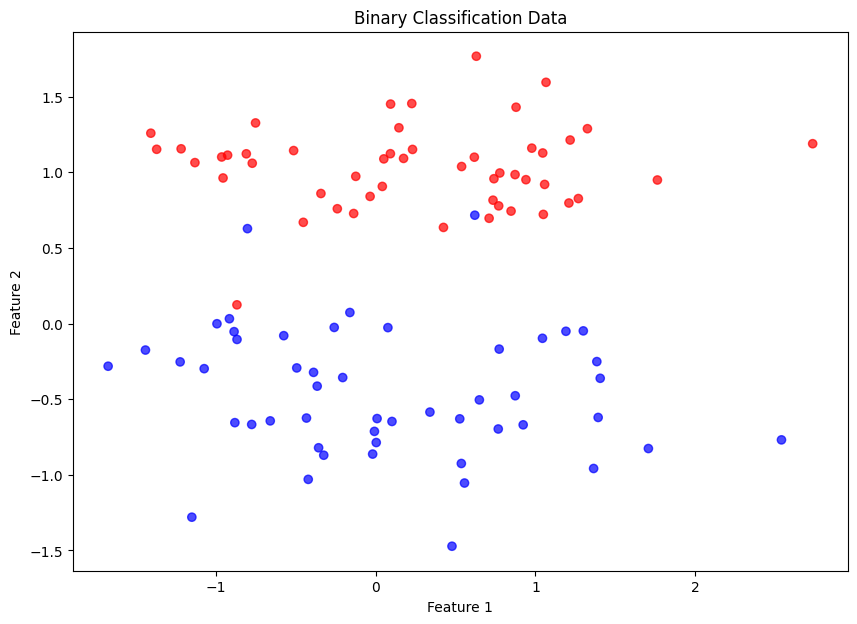

In [98]:
plt.figure(figsize=(10, 7))
plt.scatter(df['X1'], df['X2'], c=y, cmap='bwr', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Data')
plt.show()

In [63]:
sample= df.sample(n=1)
x_coordinate, y_coordinate = sample.values[0]
row_number = sample.index[0]

sample,x_coordinate, y_coordinate,row_number

(          X1        X2
 54  0.769977  0.778509,
 np.float64(0.7699773599307934),
 np.float64(0.7785088210907879),
 np.int64(54))

In [54]:
w1, w2, b = 3, -1, 3

for i, row in df.iterrows():
    x_coord = row['X1']
    y_coord = row['X2']
    value = w1 * x_coord + w2 * y_coord + b
    if value > 0:
        region = "Positive side"
    elif value < 0:
        region = "Negative side"
    else:
        region = "On the line"
    print(f"Point ({x_coord}, {y_coord}) is in {region}")
   


Point (0.5363360323820653, -0.924927977716319) is in Positive side
Point (0.8786735481908957, 1.430826797353573) is in Positive side
Point (-0.9925861794031905, -0.0009341248042192829) is in Positive side
Point (1.0493473923208656, 0.7221188950152748) is in Positive side
Point (0.8474014325766388, 0.7439570783678702) is in Positive side
Point (-1.2228735366753067, -0.2531512249099354) is in Negative side
Point (-0.5129653176356218, 1.1441967495384533) is in Positive side
Point (0.6300749386010076, 1.7680504957466459) is in Positive side
Point (-0.926046619211478, 1.113869189138752) is in Negative side
Point (-1.216854892359239, 1.1558039389931394) is in Negative side
Point (-0.43260928054801323, -0.6244805019353672) is in Positive side
Point (-0.018550804511640224, -0.862707134906656) is in Positive side
Point (0.7345010648800456, 0.8161929025234409) is in Positive side
Point (0.5561217985339653, -1.054119132656426) is in Positive side
Point (1.706604953678462, -0.8260305729826374) is 

In [118]:
def Perceptron(df, y, learning_rate=0.01, epochs=100000):
    w1, w2, b = -1, -1, 1

    for _ in range(epochs):
        sample = df.sample(n=1)
        x_coordinate, y_coordinate = sample.values[0]
        row_number = sample.index[0]
        y_true = y[row_number]

        value = w1 * x_coordinate + w2 * y_coordinate + b
        y_pred = 1 if value > 0 else 0
        error = y_true - y_pred

        w1 += learning_rate * error * x_coordinate
        w2 += learning_rate * error * y_coordinate
        b  += learning_rate * error

    return w1, w2, b


In [108]:
df.sample(n=1)

,X1,X2
58,-0.775336,-0.666832


In [119]:
w1,w2,b = Perceptron(df,y)
w1,w2,b

(np.float64(0.0018328170455720744),
 np.float64(0.04087679717035224),
 np.float64(-0.020000000000000746))

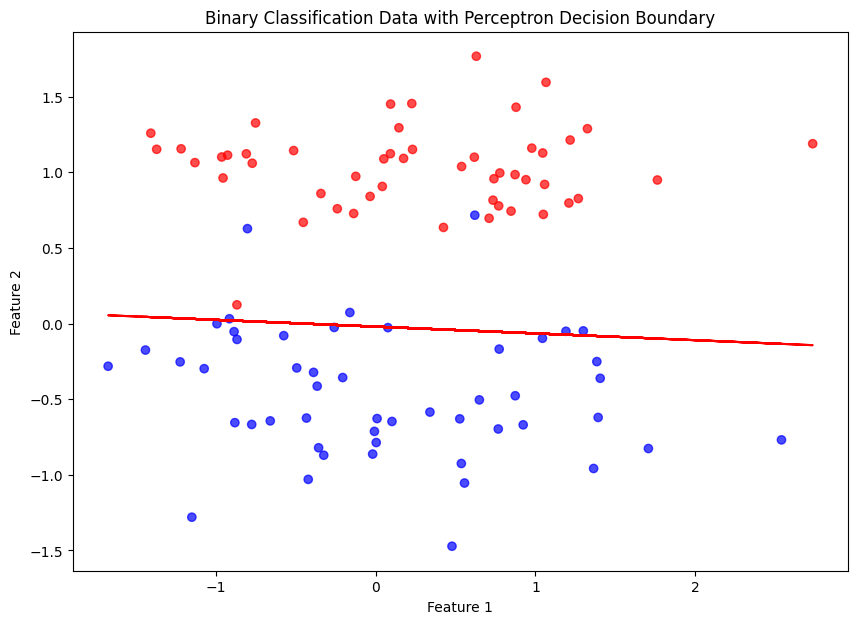

In [120]:
m= -w1/w2
y_pred_line = m*X + b

plt.figure(figsize=(10, 7))
plt.scatter(df['X1'], df['X2'], c=y, cmap='bwr', alpha=0.7)
xlim = plt.xlim()
ylim = plt.ylim()
plt.plot(X, y_pred_line, 'r-')
plt.xlim(xlim)  # Restore limits
plt.ylim(ylim)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Data with Perceptron Decision Boundary')
plt.show()


In [129]:
#Alternative Way:
def step(z):
    return 1 if z>0 else 0 
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    learning_rate = 0.01
    
    for i in range(1000):
        j= np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        error = y[j]-y_hat
        weights += learning_rate*error*X[j]
        
    return weights[0],weights[1:]


In [131]:
intercept_, coef_ = perceptron(X,y)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_plot = np.linspace(-3,3,100)
y_plot = m*x_plot + b


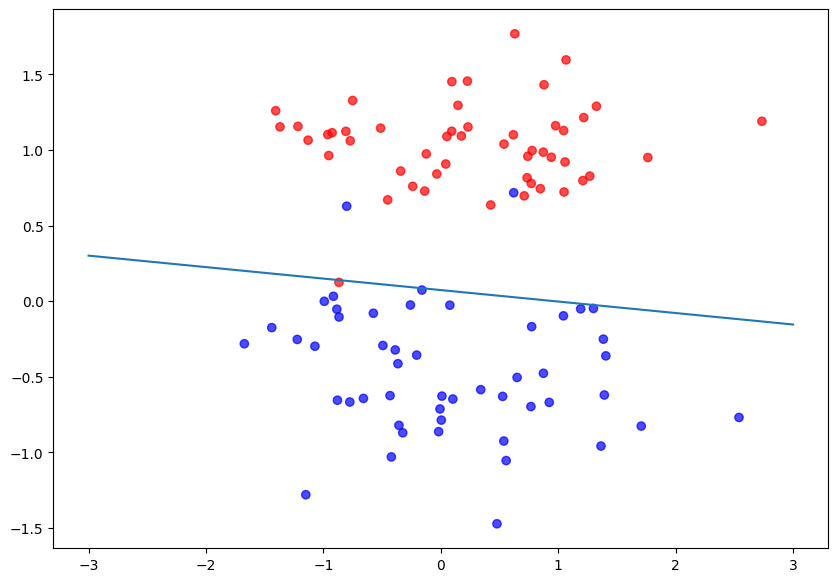

In [132]:
plt.figure(figsize=(10,7))

plt.scatter(df['X1'], df['X2'], c=y, cmap='bwr', alpha=0.7)
plt.plot(x_plot,y_plot)
plt.show()